In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

### 1. Load the datasets

In [36]:
#load datasets of wineQT detection
df = pd.read_csv("../datasets/WineQT.csv") 
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

### 2. Dataset analysis

In [37]:
df.shape

(1143, 13)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [39]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [40]:
#check column features
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

### 3. Data clean and pre-processing

In [41]:
#checking for null value in dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [42]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

In [43]:
#Drop unnecessary columns 'ID'
df = df.drop('Id', axis=1)

In [44]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
#Bin the 'quality' column into categories (e.g., Low, Medium, High)
bins = [2, 4, 6, 8]  # Define bin edges
labels = ['Low', 'Medium', 'High']  # Define labels for the bins
df['quality_category'] = pd.cut(df['quality'], bins=bins, labels=labels)

In [46]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium


In [47]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium


In [48]:
#Drop the original 'quality' column
df = df.drop('quality', axis=1)

In [49]:
#Separate features (X) and target (y)
X = df.drop('quality_category', axis=1)  # Features
y = df['quality_category']  # Target variable (categorical)

In [50]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium


In [51]:
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
import time

#Scale the feature data (excluding wine type)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training features
X_test_scaled = scaler.transform(X_test)        # Scale testing features

#Apply PCA for dimensionality reduction
start_time_with_pca = time.time()

n_components = 7  # Select number of principal components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)  # Apply PCA to training data
X_test_pca = pca.transform(X_test_scaled)        # Apply PCA to testing data

#Train the K-Nearest Neighbors (KNN) classifier
knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca, y_train)  # Train the classifier on PCA-transformed data

#Predict wine **quality** on the test set
y_pred_pca = knn_with_pca.predict(X_test_pca)

#Calculate execution time
end_time_with_pca = time.time()
time_with_pca = end_time_with_pca - start_time_with_pca

#Evaluate classification performance
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)

#Display results
print(f"Time required: {time_with_pca:,.4f} seconds")
print(f"KNN with {n_components} PCA components")
print("Classification Accuracy with PCA: {:.2f}%".format(accuracy_with_pca * 100))
print("\nClassification Report with PCA:\n", classification_report(y_test, y_pred_pca))


Time required: 0.0437 seconds
KNN with 7 PCA components
Classification Accuracy with PCA: 79.91%

Classification Report with PCA:
               precision    recall  f1-score   support

        High       0.30      0.29      0.29        28
         Low       0.00      0.00      0.00         6
      Medium       0.87      0.90      0.88       195

    accuracy                           0.80       229
   macro avg       0.39      0.39      0.39       229
weighted avg       0.78      0.80      0.79       229



In [53]:
pca.explained_variance_ratio_

array([0.28278769, 0.17229535, 0.14784708, 0.10869558, 0.08834021,
       0.06028357, 0.05020675])

In [54]:
#Get cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

#Find the number of components that explain at least 95% variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components for 95% variance: {optimal_components}")

Optimal number of components for 95% variance: 1


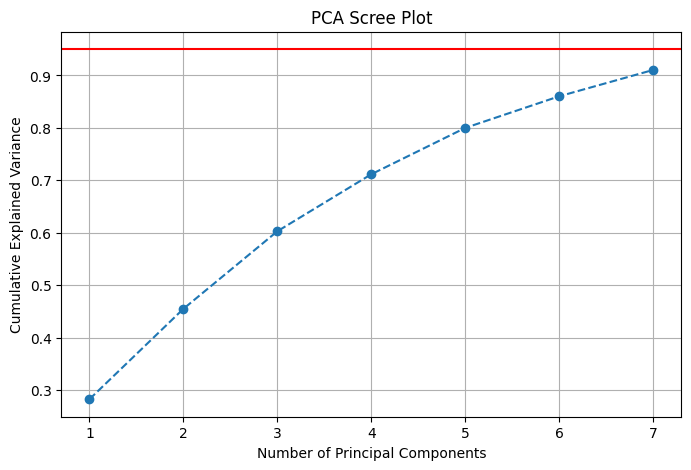

In [55]:
# Plot Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')  # Mark 95% variance threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')
plt.grid()
plt.show()

In [56]:
pca.explained_variance_ratio_

array([0.28278769, 0.17229535, 0.14784708, 0.10869558, 0.08834021,
       0.06028357, 0.05020675])

In [57]:
import time

# Store results
components = []
accuracy = []

#Loop through different numbers of PCA components
for i in range(5, 12):
    start_time_with_pca = time.time()  # Reset start time for each iteration

    #Apply PCA with i components
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    #Train a K-Nearest Neighbors (KNN) classifier with PCA
    knn_with_pca = KNeighborsClassifier(n_neighbors=5)
    knn_with_pca.fit(X_train_pca, y_train)

    #Predict the wine quality on the testing set with PCA
    y_pred_pca = knn_with_pca.predict(X_test_pca)

    #End time and calculate elapsed time
    end_time_with_pca = time.time()
    time_with_pca = end_time_with_pca - start_time_with_pca

    #Evaluate classification accuracy
    accuracy_with_pca = accuracy_score(y_test, y_pred_pca)

    #Print results
    print(f"KNN with {i} PCA components")
    print(f"Classification Accuracy with PCA: {accuracy_with_pca * 100:.2f}%")

    #Store results
    components.append(i)
    accuracy.append(round(accuracy_with_pca, 3))


KNN with 5 PCA components
Classification Accuracy with PCA: 83.41%
KNN with 6 PCA components
Classification Accuracy with PCA: 83.41%
KNN with 7 PCA components
Classification Accuracy with PCA: 79.91%
KNN with 8 PCA components
Classification Accuracy with PCA: 82.97%
KNN with 9 PCA components
Classification Accuracy with PCA: 82.97%
KNN with 10 PCA components
Classification Accuracy with PCA: 82.53%
KNN with 11 PCA components
Classification Accuracy with PCA: 83.41%


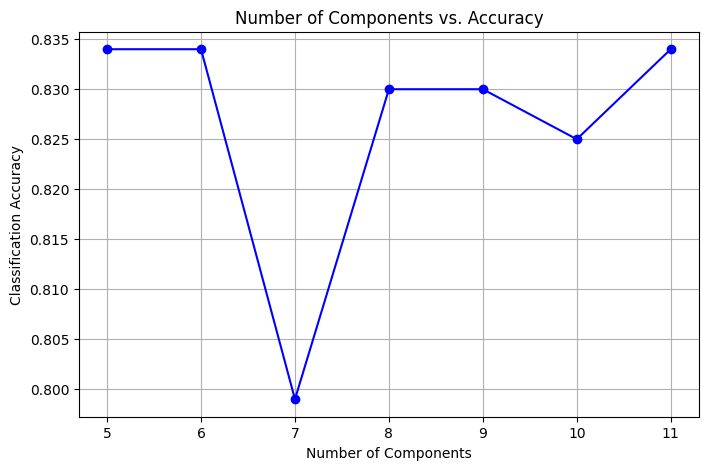

In [58]:
import matplotlib.pyplot as plt
#Plot
plt.figure(figsize=(8, 5))
plt.plot(components, accuracy, marker='o', linestyle='-', color='b')

#Labels and title
plt.xlabel("Number of Components")
plt.ylabel("Classification Accuracy")
plt.title("Number of Components vs. Accuracy")
plt.grid(True)

#Show plot
plt.show()

In [59]:
#save model
import joblib
joblib.dump(knn_with_pca, 'C:/Users/Lenovo/projects/machine_learning/models/wine_classifier.pkl')
joblib.dump(scaler, 'C:/Users/Lenovo/projects/machine_learning/models/scalar.pkl')
joblib.dump(pca, 'C:/Users/Lenovo/projects/machine_learning/models/pca.pkl')

['C:/Users/Lenovo/projects/machine_learning/models/pca.pkl']

In [60]:
#Split data into features and target
X = df.drop('quality_category', axis=1)  # Features
y = df['quality_category']  # Target

#Scale the features (use the pre-fitted scaler)
X_scaled = scaler.transform(X)

#Apply PCA (use the pre-fitted PCA)
X_pca = pca.transform(X_scaled)

#Train the KNN classifier (if not already done, or for predictions)
knn_with_pca.fit(X_pca, y)

#Predict the quality_category of new wine data
new_wine_data = [7.5, 0.25, 0.32, 3.2, 0.4, 0.045, 12.0, 2.3, 100.0, 0.6, 9.8]  # Example new data
new_wine_df = pd.DataFrame([new_wine_data], columns=X.columns)

#Preprocess the new data similarly (scaling and PCA transformation)
new_wine_scaled = scaler.transform(new_wine_df)  # Scale the new data
new_wine_pca = pca.transform(new_wine_scaled)    # Apply PCA to the scaled data

#Predict the wine quality category
predicted_quality = knn_with_pca.predict(new_wine_pca)

#Output the predicted quality
print(f"Predicted Wine Quality Category: {predicted_quality[0]}")


Predicted Wine Quality Category: Medium


In [61]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
1133,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,High
1134,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,Medium
1135,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,Medium
1136,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,Medium
1137,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,Medium
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,Medium
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,Medium
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Medium
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Medium
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Medium
